# Singular value decomposition for data compression

## SVD review

Singular value decomposition (SVD) factors any $m \times n$ matrix $A$ into a product:

$$A=U \Sigma V^T$$

Where $U$ and $V$ are orthogonal matrices and $\Sigma$ is a diagonal matrix.

The decomposition ressembles writting the linear transformation matrix $A$ in respect to an alternative basis, say $V$: $A=VDV^{-1}$. But this relationship can only exist is $V$ is invertible. Meaning $V$ needs to be a basis for both row and column space of $A$, and $A$ should be an $n \times n$ square matrix. An special case of this decomposition is when $V$ is composed by the eigenvectors of $A$. In that case, the transformation written in respect of $V$ is a diagonal matrix, often named $\Lambda$. But this transformation has an extra requisite, where $A$ needs to have $n$ linear independent eigenvectors, in that case $A$ is said to be diagonalizable. An even more special case happens when $A$ is symmetric. In that case the eigenvectors are orthogonal to each other, so $V^{-1}$ = $V^T$ and $A=V\Lambda V^T$

One very useful advantage of SVD is that it can be used for any matrix, for instance rectangular matrices and matrices with nullspaces. But in order to achieve that, SVD uses not one, but two different basis to represent the linear transformation of $A$. One basis for $\Re^n$, $V$ and other basis for $\Re^m$, $U$. We will see that those bases are orthonormal, and that that the singular values $\Sigma$ will compose a diagonal matrix, with extra zeros to accomodate nullspaces and different dimensions for $\Re^n$ and $\Re^m$.

The idea behind SVD is to find a set of orthonormal vectors $\mathbf{v_i}$ that corresponds to another set of orthonormal vectors $\mathbf{u_i}$ scaled by singular values $\sigma_i$ when transformed by $A$:

$$A\mathbf{v_i}=\sigma_i\mathbf{u_i}$$

In matrix notation:

$$
\begin{split}
A \begin{bmatrix} \mathbf{v_1} &\dots &\mathbf{v_r} \end{bmatrix} &=
\begin{bmatrix} \sigma_1\mathbf{u_1}& \dots &\sigma_r\mathbf{u_r} \end{bmatrix}\\
A \begin{bmatrix} \mathbf{v_1} &\dots &\mathbf{v_r} \end{bmatrix} &=
\begin{bmatrix} \mathbf{u_1} &\dots &\mathbf{u_r} \end{bmatrix}
\begin{bmatrix} \sigma_1 &\dots & 0 \\ \vdots & \ddots &\vdots \\ 0 & \dots & \sigma_r\end{bmatrix} \\
A V &= U \Sigma \\
A &= U \Sigma V^T
\end{split}
$$

That can be confirmed by using numpy SVD implementation,

In [3]:
import numpy as np

Taking by example the matrix:

$$
A = \begin{bmatrix} 1 & 2 \\ 0 & 1 \end{bmatrix}
$$

In [4]:
A= np.array([
    [1, 2],
    [0, 1]
], dtype=np.float64)

Numpy implementation returns just the $\Sigma$ entry values and the transpose of $V$, we'll take extra care to get the original matrices

In [5]:
U,Sigma, V = np.linalg.svd(A)
V = V.T; Sigma = np.diag(Sigma)

From that we can confirm that $\mathbf{V}$ and $\mathbf{U}$ are orthogonal matrices

In [6]:
print(np.allclose(np.dot(V.T,V), np.identity(2)))
print(np.allclose(np.dot(U.T,U), np.identity(2)))

True
True


And for last, we can also confrm that the $\mathbf{A}$ tranformation of $\mathbf{V}$ will lead to $\mathbf{U}\mathbf{\Sigma}$

In [7]:
np.allclose(np.dot(A,V), np.dot(U,Sigma))

True

We can use matplotlib to see the how the orthonormal vectors $\mathbf{V}$ are mapped to the the orthonormal vectors $\mathbf{U}$ scaled by $\Sigma$ when transformed by $\mathbf{A}$:

In [8]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


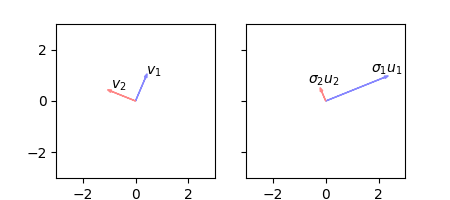

In [38]:
f,ax = plt.subplots(1,2,figsize=(4.5, 2), sharey=True)
ax[0].set_xlim(-3,3); ax[0].set_ylim(-3,3)
ax[1].set_xlim(-3,3); ax[1].set_ylim(-3,3)
ax[0].arrow(0, 0, *V[:,0], head_width=0.1,color='#8787fe'); ax[0].text(*V[:,0]+[0.0, 0.1],'$v_1$')
ax[0].arrow(0, 0, *V[:,1], head_width=0.1,color='#fe8787'); ax[0].text(V[0,1], V[1,1]+0.1,'$v_2$')
ax[1].arrow(0, 0, *np.dot(U,Sigma)[:,0], head_width=0.1,color='#8787fe'); ax[1].text(np.dot(U,Sigma)[0,0]-0.5, np.dot(U,Sigma)[1,0]+0.2,'$\sigma_1 u_1$')
ax[1].arrow(0, 0, np.dot(U,Sigma)[0,1], np.dot(U,Sigma)[1,1], head_width=0.1,color='#fe8787'); ax[1].text(np.dot(U,Sigma)[0,1]-0.5, np.dot(U,Sigma)[1,1]+0.3,'$\sigma_2 u_2$')

These panels will confirm the orthogonality expressed before and the singular values that will and increase $\mathbf{u1}$ and shrink $\mathbf{u2}$

In [43]:
print('sigma 1:', Sigma[0,0])
print('sigma 2:', Sigma[1,1])

sigma 1: 2.41421356237
sigma 2: 0.414213562373


As (A=MDM-1) can be understood by as the transformation T(X)=Ax in respect to an alternative basis (M): (T(x))_M=D(x)_M). For MDM-1x, the operations are:
thechange of basis for x from the standard basis to the basis M,
the transformation in respect to the basis M
the change of basis for T(x) from M back to the standard basis
Which should produce Ax

SVD can also be visualzied in such a way but as mentioned before it uses two different bases (one for Rn and one for Rm). Using as an example the matrix A presented before and the vector x= [5 2]T

<IPython.core.display.Javascript object>


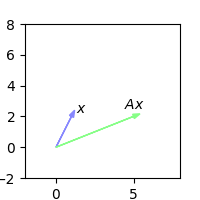

In [44]:
x = np.array([1,2], dtype=np.float64)
b = np.dot(A,x)
f,ax = plt.subplots(figsize=(2, 2), sharey=True)
ax.set_xlim(-2,8); ax.set_ylim(-2,8)
ax.arrow(0, 0, *x, head_width=0.3,color='#8787fe'); ax.text(*x + [0.3,0.2],'$x$')
ax.arrow(0, 0, *b, head_width=0.3,color='#87fe87'); ax.text(*b + [-0.6,0.5],'$Ax$')

The panel above

SVD works as:
Change of basis for x from the standard basis to the basis V (V' x). Observe that this basis is orthonormal as the stanndard basis, so this change of basis is just a rotation, the norm of x should't have changed:

In [51]:
np.allclose(np.linalg.norm(x), np.linalg.norm(np.dot(V.T,x)))

True

The transformation Sigma, which should both reproduce the original transformation A in respect of the basis V and transform x from Rn to Rm
The transformation of SigmaVtx to the standars basis

<IPython.core.display.Javascript object>


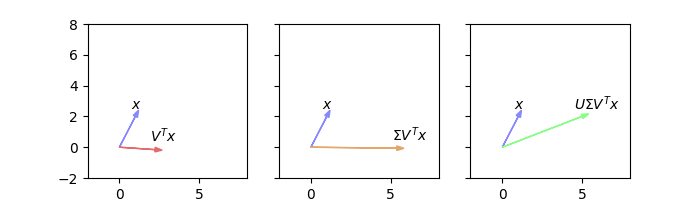

In [37]:
f,ax = plt.subplots(1,3,figsize=(7, 2), sharey=True)
for a in ax:
    a.set_xlim(-2,8); a.set_ylim(-2,8)
    a.arrow(0, 0, *x, head_width=0.3,color='#8787fe'); a.text(*x + [-0.3,0.5],'$x$')
ax[0].arrow(0, 0, *np.dot(V.T,x), head_width=0.3,color='#e36b6b'); ax[0].text(*np.dot(V.T,x) + [-0.3,0.5],'$V^Tx$')
ax[1].arrow(0, 0, *np.dot(Sigma,Vt_x), head_width=0.3,color='#e3a76b'); ax[1].text(*np.dot(Sigma,Vt_x) + [-0.3,0.5],'$\Sigma V^T x$')
ax[2].arrow(0, 0, *np.dot(U, SVt_x), head_width=0.3,color='#87fe87'); ax[2].text(*np.dot(U, SVt_x) + [-0.5,0.4],'$U \Sigma V^T x$')

In [20]:
from PIL import Image

<IPython.core.display.Javascript object>


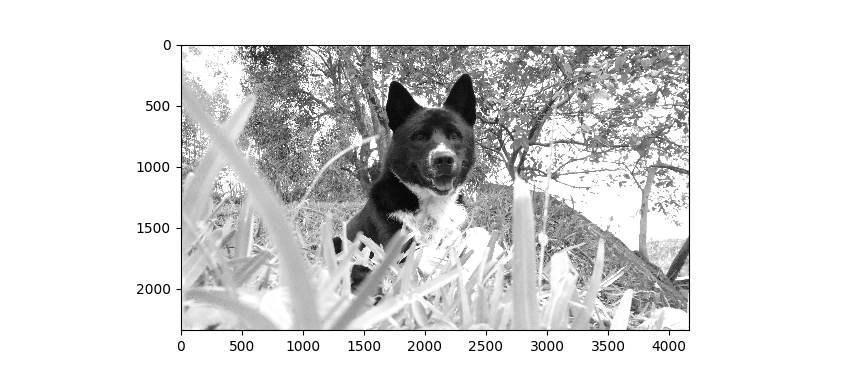

In [21]:
duque = Image.open('imgs/doggy.jpg')
data = np.asarray( duque, dtype=np.float64 )
f,ax = plt.subplots(figsize=(10,10),dpi=100)
R=data[:,:,0]/255.0
G=data[:,:,1]/255.0
B=data[:,:,2]/255.0
#ax.imshow(np.dstack((R,G,B)))
ax.imshow(G,cmap='gray')

In [13]:
m,n=G.shape
print(m,n)

2340 4160


In [4]:
U,D,VT=np.linalg.svd(G)
V=VT.T

In [5]:
D=np.diag(D)
A=np.zeros((2,2))
B=np.diag([1,2])
print(A)
print(B)
np.hstack((A,B))

[[ 0.  0.]
 [ 0.  0.]]
[[1 0]
 [0 2]]


array([[ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  2.]])

In [6]:
if m>D.shape[0]:
    D=np.vstack((D,np.zeros((m-D.shape[0],n))))
elif n>D.shape[0]:
    D=np.hstack((D,np.zeros((m,n-D.shape[0]))))

In [7]:
print(U.shape,D.shape,V.shape)

(2340, 2340) (2340, 4160) (4160, 4160)


In [9]:
def reducedRankMatrixWithSVD(rank):
    Dl=np.copy(D)
    Dl[rank:-1,:]=0.0
    Al = np.dot(np.dot(U,Dl),VT)
    return Al
doggy_rank5 = reducedRankMatrixWithSVD(5)
doggy_rank10 = reducedRankMatrixWithSVD(10)
doggy_rank20 = reducedRankMatrixWithSVD(20)
doggy_rank50 = reducedRankMatrixWithSVD(50)
doggy_rank100 = reducedRankMatrixWithSVD(100)
doggy_rank500 = reducedRankMatrixWithSVD(500)

<IPython.core.display.Javascript object>


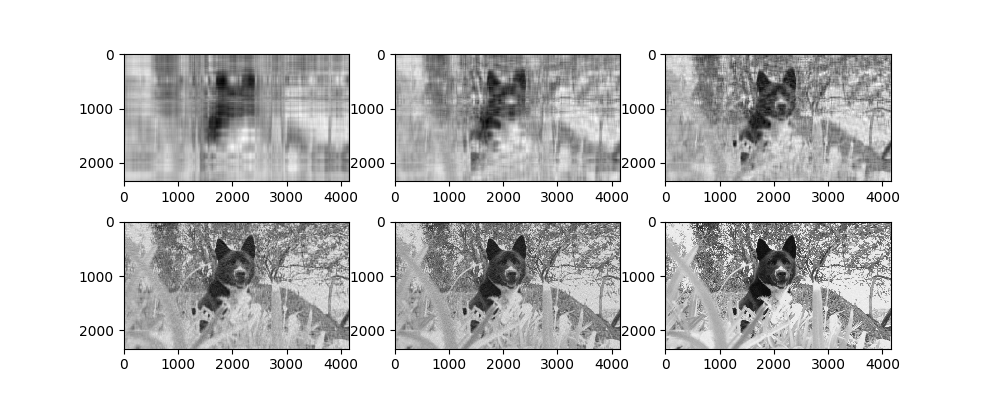

In [21]:
f,ax = plt.subplots(2,3,figsize=(3*n/600, 2*m/600))
ax[0,0].imshow(doggy_rank5,cmap='gray')
ax[0,1].imshow(doggy_rank10,cmap='gray')
ax[0,2].imshow(doggy_rank20,cmap='gray')
ax[1,0].imshow(doggy_rank50,cmap='gray')
ax[1,1].imshow(doggy_rank100,cmap='gray')
ax[1,2].imshow(doggy_rank500,cmap='gray')
plt.show()
